In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/WeatherDataP.csv')

In [3]:
df.head()

,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83


In [4]:
x = df[['Pressure (millibars)']]
y = df['Humidity']

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [7]:
model.score(x_train, y_train)

0.29065760334760526

In [8]:
model.score(x_test, y_test)

0.14324706577023627

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pressure (millibars)', ylabel='Humidity'>

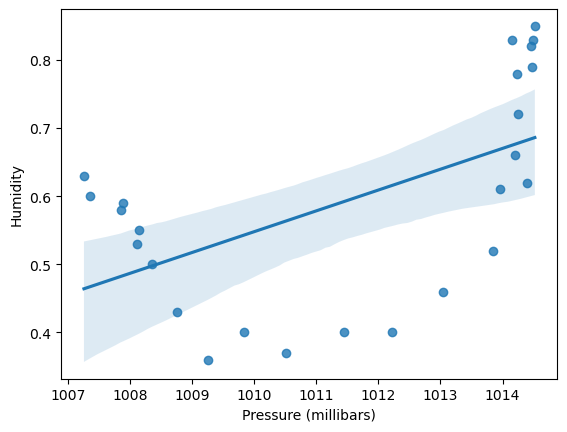

In [9]:
sns.regplot(x, y, data=df)

In [10]:
from sklearn.preprocessing import PolynomialFeatures

pre_process = PolynomialFeatures(degree=2)
x_poly = pre_process.fit_transform(x)

In [11]:
df_x_poly = pd.DataFrame(x_poly)
df_x_poly.columns = ['1', 'x', 'x_squared']
df_x_poly

,1,x,x_squared
0,1.0,1014.40,1.029007e+06
1,1.0,1014.20,1.028602e+06
2,1.0,1014.47,1.029149e+06
3,1.0,1014.45,1.029109e+06
4,1.0,1014.49,1.029190e+06
5,1.0,1014.52,1.029251e+06
6,1.0,1014.16,1.028521e+06
7,1.0,1014.24,1.028683e+06
8,1.0,1014.25,1.028703e+06
9,1.0,1013.96,1.028115e+06


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size=.20, random_state=1)

In [13]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(x_poly)

In [15]:
model.score(x_train, y_train)

0.821262219719311

In [16]:
model.score(x_test, y_test)

0.9427391324386682

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


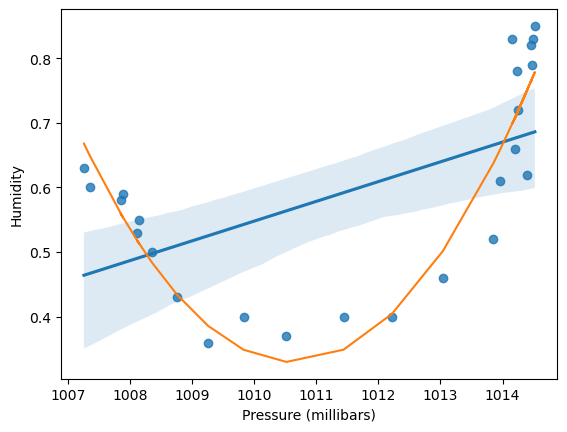

In [17]:
sns.regplot(x, y, data=df)
plt.plot(x, y_pred)